# Project

## Download Data

In [2]:
import urllib
import json
import pandas as pd
from bd_addons.interpro_data import *
from bd_addons.HmmPy import *
from bd_addons.metrics import *
from Bio import SearchIO, SeqIO

url = "https://www.ebi.ac.uk/interpro/api/protein/reviewed/entry/pfam/pf03060?format=json"

In [3]:
metadata, entries, gt = get_data(url, 1)


# 8 - Evaluate Ability of Matching sequences
Once we made the PSI-BLAST e HMM-searches we will have some files where all the sequences are... we should:

- Find a format that we can parse (there should be options in the documentations of thevarious methods);
- Decide a threshold for the E-value and take all the hits that are below that E value;
- All the remaining sequences (call them OUT_SEQs)are the ones that, according to our model, belong to the Domain family.
- Make a Confusion Matrix comparing OUT_SEQs with the ground truth.
- compute accuracy, sensitivity, specificty etc

## HMM Searches Performance

In [3]:
metrics_df, parsed_tblouts, parsed_domtblouts, parsed_psiblast = metrics_8(gt, 0.01, 0.01, 0.01)
metrics_df

,accuracy,precision,recall,specificity,balanced_accuracy,mcc,f1_score
hmmsearch_out_C_1_denoised1_swissprot.domtblout,0.999369,0.060686,1.000000,0.999369,0.999684,0.246268,0.114428
hmmsearch_out_C_1_swissprot.domtblout,0.999358,0.059740,1.000000,0.999358,0.999679,0.244340,0.112745
hmmsearch_out_C_3_denoised1_uniref90.domtblout,0.999491,0.074194,1.000000,0.999491,0.999746,0.272316,0.138138
hmmsearch_out_C_3_uniref90.domtblout,0.999493,0.074434,1.000000,0.999493,0.999746,0.272756,0.138554
hmmsearch_out_C_4_denoised1_uniref90.domtblout,0.999651,0.100917,0.956522,0.999652,0.978087,0.310633,0.182573
hmmsearch_out_C_4_uniref90.domtblout,0.999631,0.096070,0.956522,0.999633,0.978077,0.303077,0.174603
HMM_reference_search.domtblout,0.998810,0.033141,1.000000,0.998810,0.999405,0.181939,0.064156
hmmsearch_out_M_1.domtblout,0.999450,0.069069,1.000000,0.999450,0.999725,0.262738,0.129213
hmmsearch_out_M_4_denoised1_uniref90.domtblout,0.999661,0.103774,0.956522,0.999663,0.978092,0.315000,0.187234
hmmsearch_out_M_4_uniref90.domtblout,0.999640,0.098214,0.956522,0.999642,0.978082,0.306443,0.178138


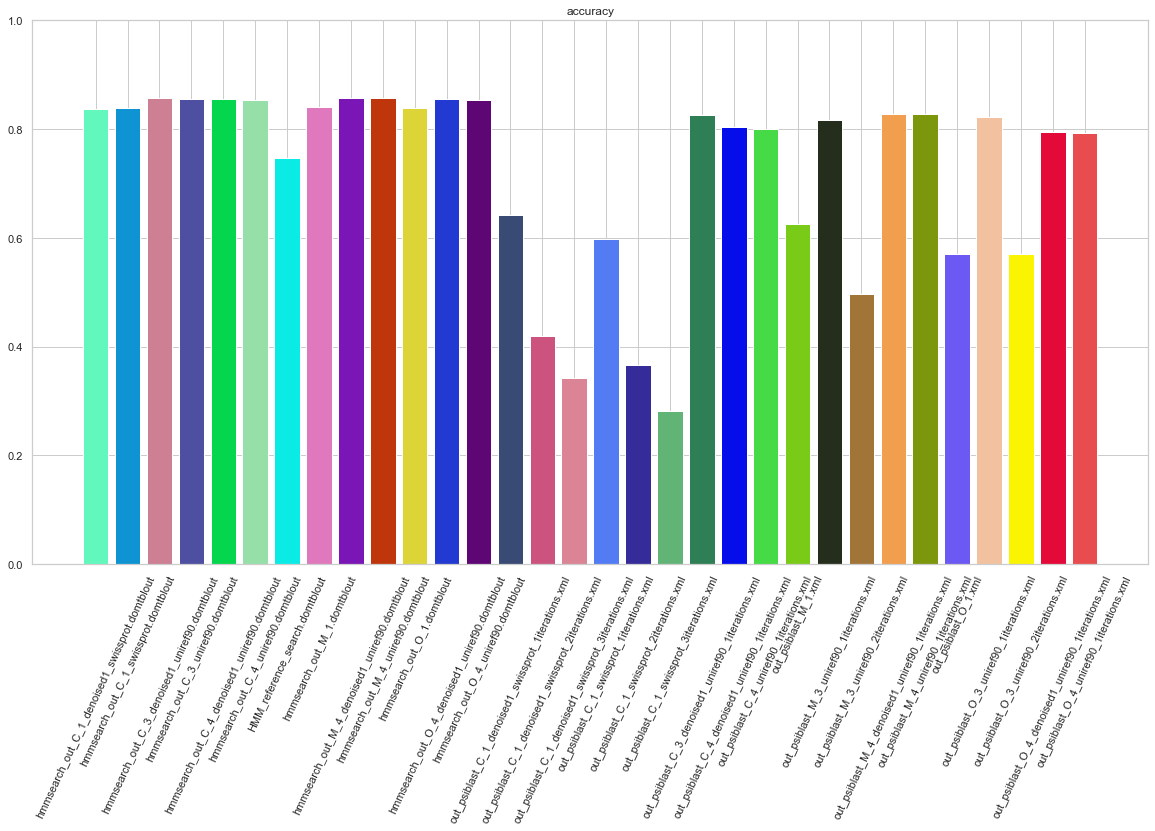

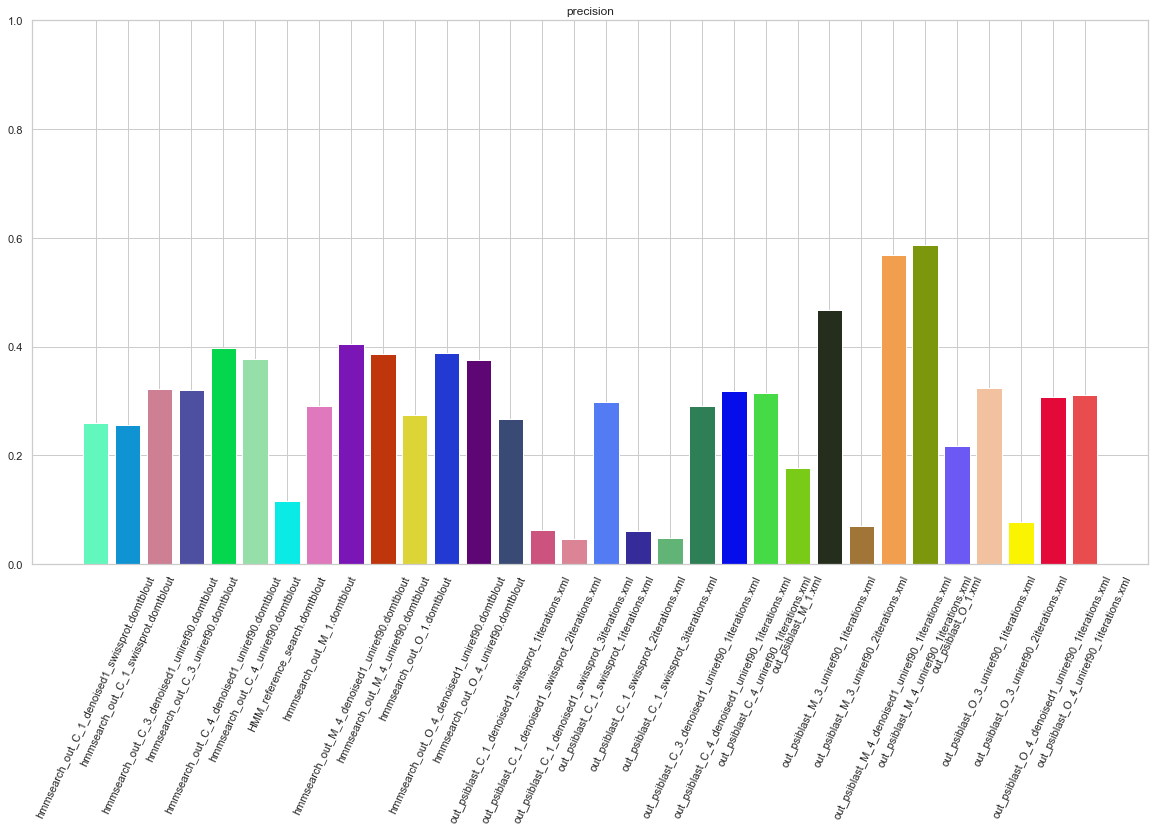

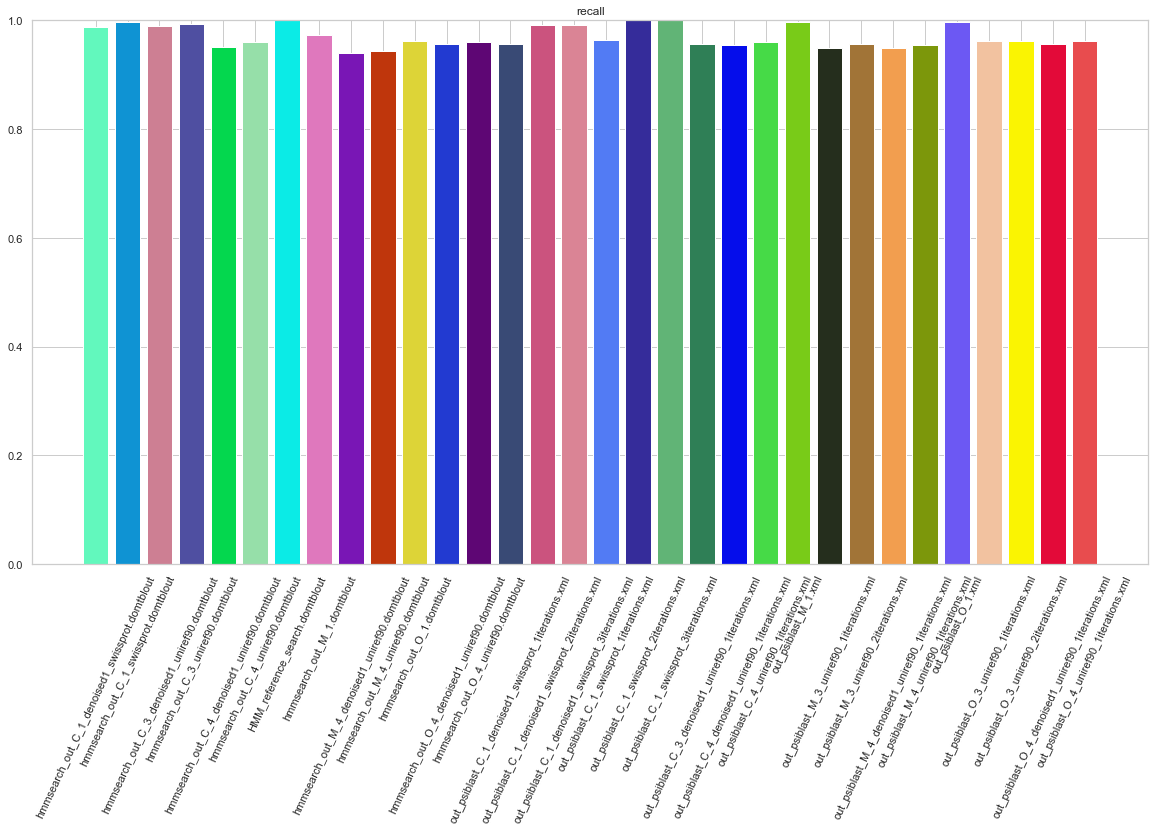

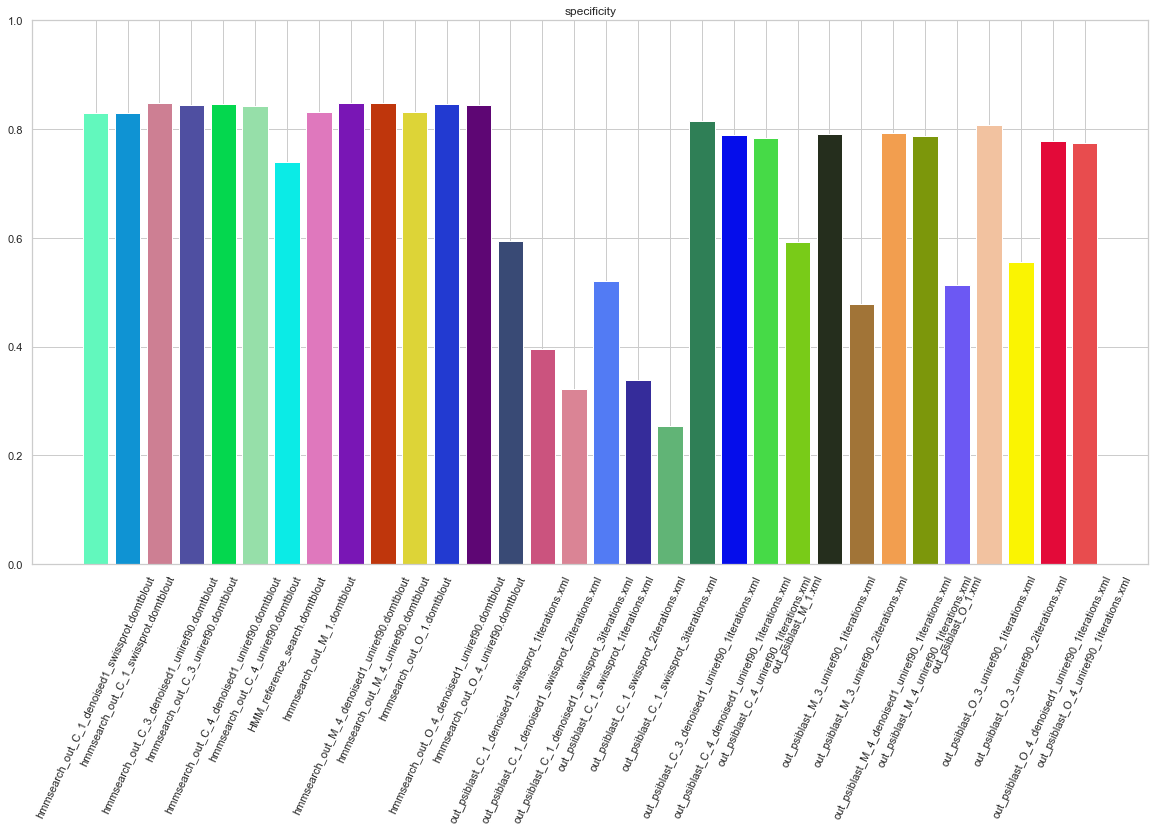

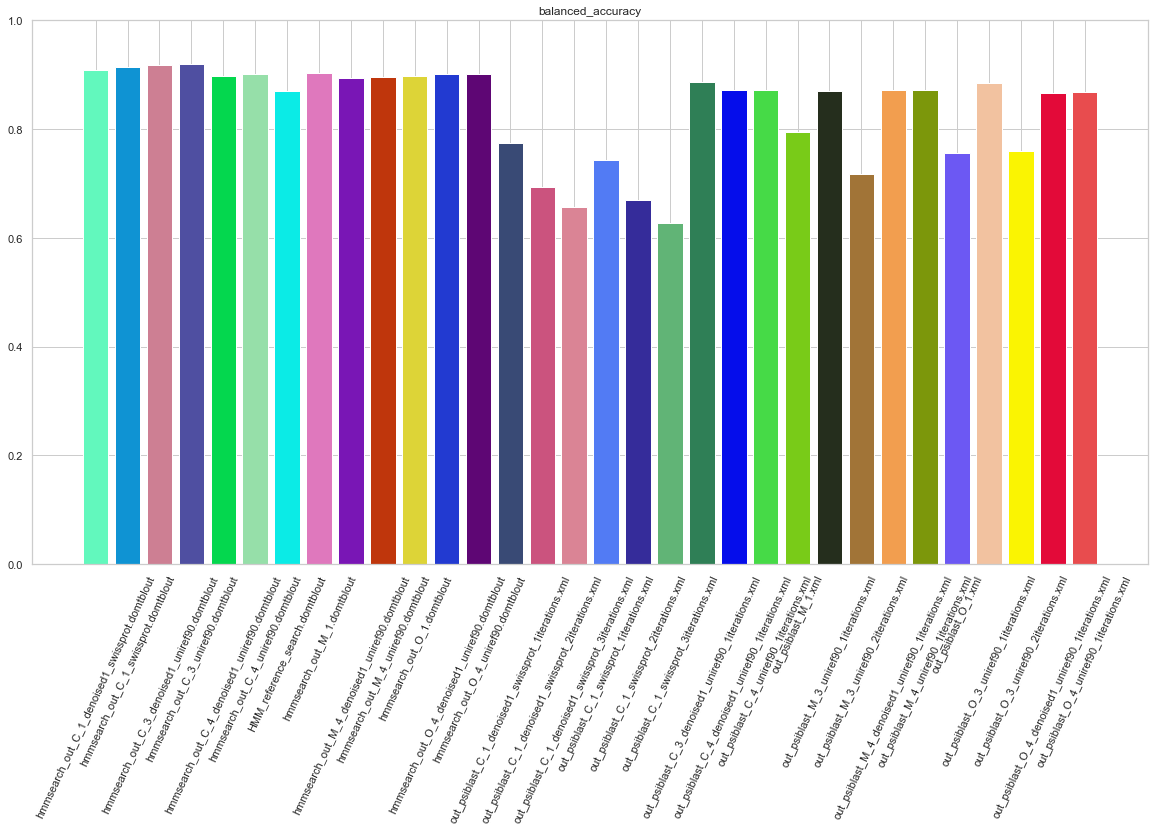

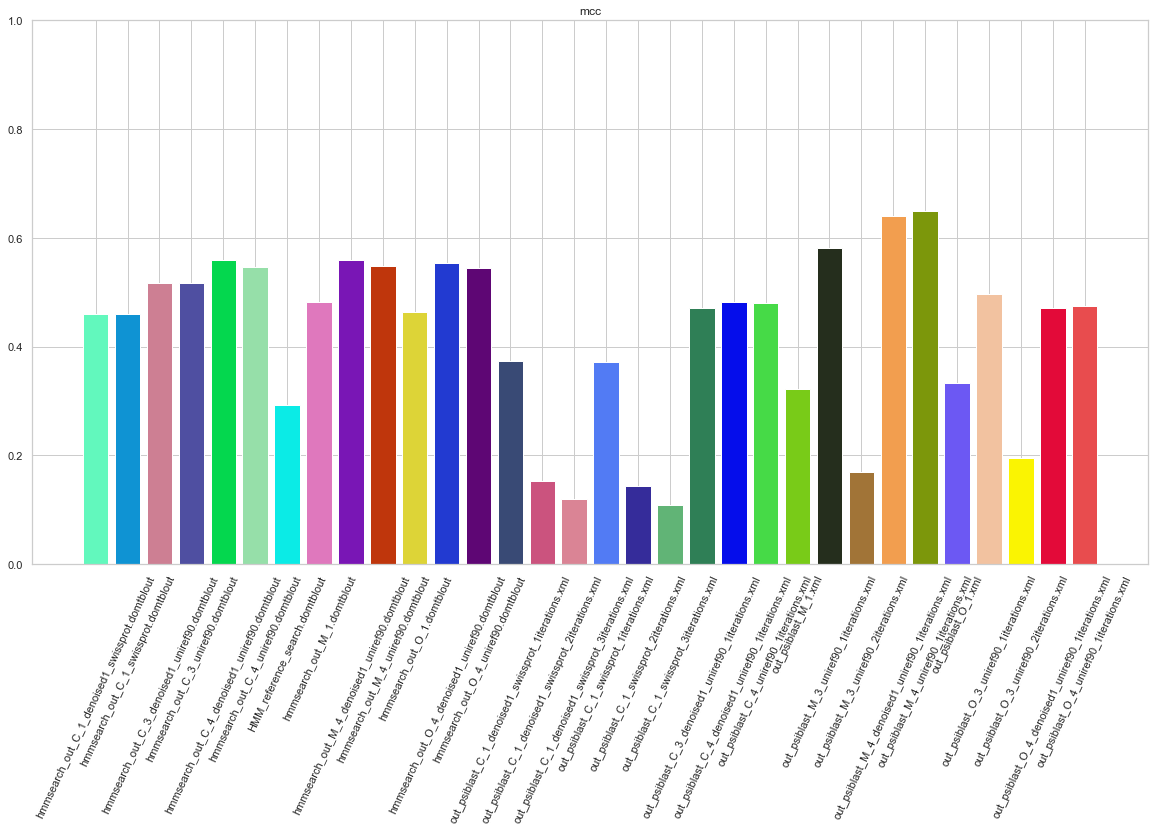

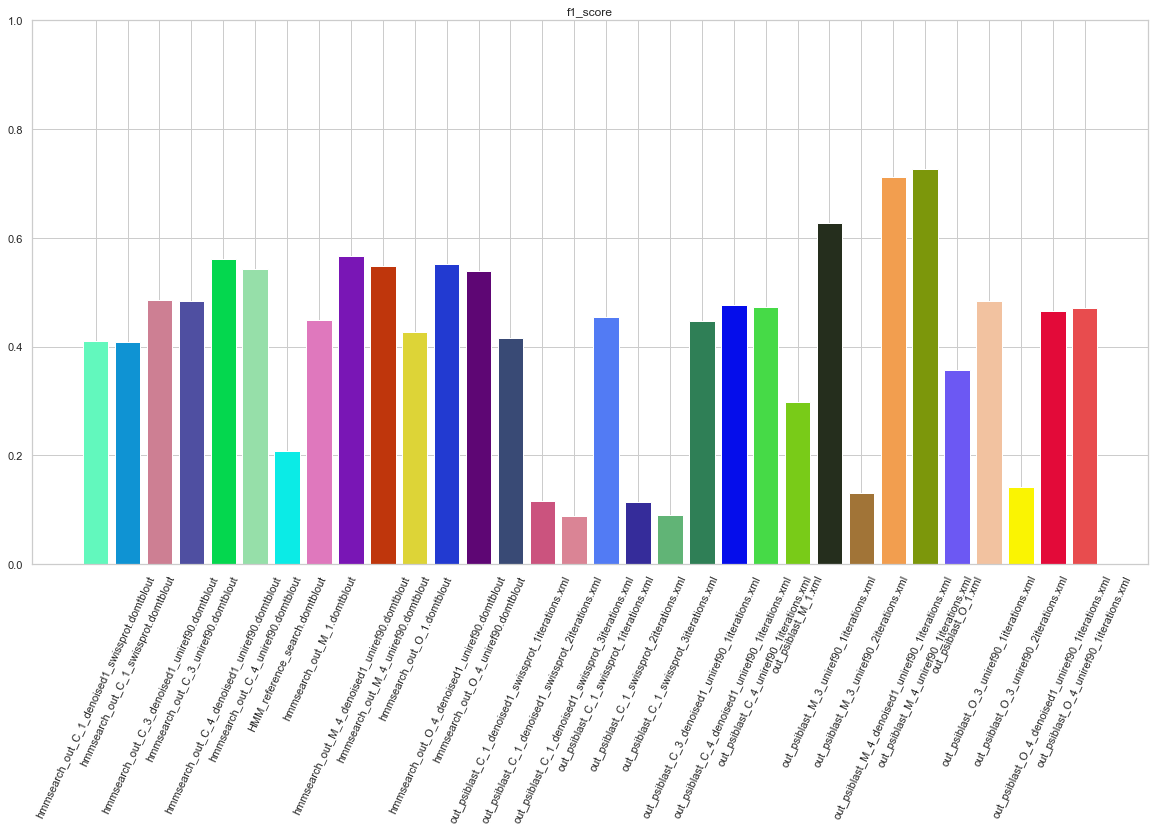

In [6]:
plot_metrics_8(metrics_df)

# 9 - Evaluate the ability of matching domain positions
Here we want to evaluate how good our model is at estimating domain positions inside the found proteins.

In [4]:
metrics_df, conf_df = metrics_9(parsed_domtblouts, parsed_psiblast, gt, 0.01, 0.01, 0.01)
metrics_df

,accuracy,precision,recall,specificity,balanced_accuracy,mcc,f1_score
hmmsearch_out_C_1_denoised1_swissprot.domtblout,0.837850,0.259392,0.987158,0.828780,0.907969,0.459217,0.410831
hmmsearch_out_C_1_swissprot.domtblout,0.838639,0.256295,0.997641,0.829262,0.913451,0.460209,0.407821
hmmsearch_out_C_3_denoised1_uniref90.domtblout,0.856991,0.321304,0.989385,0.847319,0.918352,0.517756,0.485078
hmmsearch_out_C_3_uniref90.domtblout,0.854959,0.319944,0.993710,0.844761,0.919235,0.517499,0.484042
hmmsearch_out_C_4_denoised1_uniref90.domtblout,0.855613,0.397667,0.951514,0.845321,0.898417,0.558569,0.560912
hmmsearch_out_C_4_uniref90.domtblout,0.852901,0.377804,0.960031,0.842209,0.901120,0.547091,0.542225
HMM_reference_search.domtblout,0.747295,0.116506,1.000000,0.738583,0.869292,0.293341,0.208697
hmmsearch_out_M_1.domtblout,0.841171,0.291431,0.973398,0.831772,0.902585,0.482520,0.448564
hmmsearch_out_M_4_denoised1_uniref90.domtblout,0.857504,0.404933,0.940244,0.848427,0.894336,0.559743,0.566075
hmmsearch_out_M_4_uniref90.domtblout,0.856417,0.386351,0.944437,0.847467,0.895952,0.548369,0.548374


In [5]:
conf_df

,true_positives,true_negatives,false_positives,false_negatives
hmmsearch_out_C_1_denoised1_swissprot.domtblout,7533,104108,21508,98
hmmsearch_out_C_1_swissprot.domtblout,7613,107294,22091,18
hmmsearch_out_C_3_denoised1_uniref90.domtblout,7550,88505,15948,81
hmmsearch_out_C_3_uniref90.domtblout,7583,87709,16118,48
hmmsearch_out_C_4_denoised1_uniref90.domtblout,7261,60104,10998,370
hmmsearch_out_C_4_uniref90.domtblout,7326,64397,12065,305
HMM_reference_search.domtblout,7631,163495,57868,0
hmmsearch_out_M_1.domtblout,7428,89294,18060,203
hmmsearch_out_M_4_denoised1_uniref90.domtblout,7175,59020,10544,456
hmmsearch_out_M_4_uniref90.domtblout,7207,63599,11447,424


# Part2
From this point, we will have to choose a single best model. 
Since we will probably struggle to find the best model until the end, here the "PATH_MODEL_PROTS" will be the path of the csv file containing the prediction of the future best model.

In [3]:
import urllib
import json
import pandas as pd
from bd_addons.interpro_data import *
from bd_addons.HmmPy import *
from bd_addons.metrics import *
from Bio import SearchIO, SeqIO
from Bio.PDB.PDBList import *

In [4]:
from bd_addons.family_structures import *
bestmodel = 'psiblast_C_4_uniref90_1iterations'
# original dataset
PATH_MODEL_PROTS = '.\data_team_1\PSSMs\PSSM_C\parsed\out_{}.csv'.format(bestmodel)

# map from pdb chains to uniprot entries
# use your path where you saved the file for now
# SIFTS_PATH = '..\midterm exams\midterm2\data\pdb_chain_uniprot.tsv'
SIFTS_PATH = '..\\midterm exams\\midterm2\\data\\uniprot_segments_observed.tsv'

In [5]:
## DONT DELETE THIS CELL. We use it to print the proteins found by the best model for ease of copy-pasting
# the uniprot codes in https://www.uniprot.org/uploadlists/ to create "family_sequences" database!
model_prots_df = pd.read_csv(PATH_MODEL_PROTS)
model_prots = list(model_prots_df.ids.values)
for i in model_prots:
    print(i)

D0V3Y4
Q9HWH9
B2TEK6
P47177
Q12723
Q49W60
Q99VF6
A5IR97
A6U025
Q6GIG7
Q6GB05
Q8NXG7
A8Z1H7
A6QFD2
Q5HHG4
Q2FZX9
Q2FIF3
Q4L4T4
O05413
O06179
Q9I4V0
Q01284
Q6A6A0
Q7NTY1
Q8R7I7
Q58070
A9BJH4
C3K017
Q8T6T2
Q8KCW4
Q3KFC7
B5EFU4
Q39UK4
Q4KFI7
Q4QJK8
P46454
A5UBE3
Q9ZL14
A5UFG9
Q48JY0
C6E6N2
Q4ZUM3
O50316
Q8FWN5
B0BTC7
Q8YBP2
B3GZA5
A3N3E5
Q6DAY3
A5G3H0
Q8A9C3
Q64TN0
Q5LCI2
Q883P1
Q88L40
A6TVS0
Q5P1A9
P56088
Q13ZM3
A6VW35
B0KG90
P24547
P12269
E9PU28
P12268
Q480K7
A4WDW4
Q1ICL4
Q12658
B2JKL9
Q07152
Q4VRV8
B3E4T4
C1DDY1
Q3SWY3
O87392
Q58746
B1XV77
O26154
B4SMK1
B2FIJ0
B0UXP9
A1WTJ3
B0T7X2
B9M211
P16250
Q5QX65
Q01YA2
A4VM41
A2SQR0
A6L5H1
B5YJH1
A9IN89
Q8CWG1
F7CYY5
A5FJK8
Q6A912
A6V325
A0B7W4
P54322
Q9SA34
Q9HZF8
B7UWL8
Q02PL5
A9AJX4
A1K7M2
Q5KP44
Q6FFS1
Q6G0J2
B2UNA2
A1ASB3
Q82AA1
Q3IU78
A9B5I3
B9DPN4
Q8PE75
Q4V0H2
Q9HLK8
A1KRQ4
A9M3G1
Q5H6Z4
B2SUY3
Q2P9K0
B1J5B5
Q2SVL9
B0RLM2
B1JPU0
Q66C32
A4TKI4
Q1CGZ1
A9R623
Q8ZFV8
B2JZQ1
Q1C9P0
A7FJF0
Q3BZH2
Q8PR33
Q2SS69
Q8RG85
O35435
B3PIL8
O00086
Q59Q46

In [4]:
pdb_db = generate_pdb_df(SIFTS_PATH, PATH_MODEL_PROTS)
pdb_db.to_csv(".\\data_team_1\\_part_2\\mappings\\mapping_{}.csv".format(bestmodel))
pdb_db.head()

,index,pdb,sp_primary,chain,pdb_beg,pdb_end,sp_beg,sp_end
0,45184,4q4k,Q9HWH9,A,1,351,1,351
1,45185,4q4k,Q9HWH9,B,2,351,2,351
2,54616,5dn1,P16250,A,1,240,1,240
3,66868,5ue9,Q9CFW8,A,5,310,5,310
4,66870,5ue9,Q9CFW8,C,5,309,5,309


In [5]:
# keep only chains with 80% or more coverage
pdb_db_filtered = filter_pdb_db(pdb_db)
pdb_ids = list(pdb_db_filtered.pdb.unique())
print(pdb_ids)
print(len(pdb_ids))

['4q4k', '5dn1', '5ue9', '6udo', '1ep2', '1nf7', '1uum', '2x30', '6e2a', '6u9o', '6udp', '1uuo', '6uaj', '6ua5', '1ep1', '1ep3', '2cu0', '4ixh', '4jej', '4qj1', '6i0m', '6u8s', '6u8r', '6uc2', '6dvh', '6i0o', '6u8n', '1vzw', '2gjn', '2vep', '4ori', '4rv8', '6ua2', '1b3o', '3ffs', '6ua4', '1jr1', '1nfb', '2gjl', '5ksw', '6bka', '6dvi', '6u8e', '6udq']
44


In [6]:
#We use the function "retrieve_pdb_file" provided by Biopython to automatically download all the needed pdb files.
pdblist = PDBList(server='ftp://ftp.wwpdb.org')
pdblist.download_pdb_files(pdb_codes = pdb_ids, pdir = '.\\data_team_1\\_part_2\\original_datasets\\family_structures\\pdbs_{}'.format(bestmodel), file_format="pdb")

Structure exists: '.\data_team_1\_part_2\original_datasets\family_structures\pdbs_psiblast_C_4_uniref90_1iterations\pdb4q4k.ent' 
Structure exists: '.\data_team_1\_part_2\original_datasets\family_structures\pdbs_psiblast_C_4_uniref90_1iterations\pdb5dn1.ent' 
Structure exists: '.\data_team_1\_part_2\original_datasets\family_structures\pdbs_psiblast_C_4_uniref90_1iterations\pdb5ue9.ent' 
Structure exists: '.\data_team_1\_part_2\original_datasets\family_structures\pdbs_psiblast_C_4_uniref90_1iterations\pdb6udo.ent' 
Structure exists: '.\data_team_1\_part_2\original_datasets\family_structures\pdbs_psiblast_C_4_uniref90_1iterations\pdb1ep2.ent' 
Structure exists: '.\data_team_1\_part_2\original_datasets\family_structures\pdbs_psiblast_C_4_uniref90_1iterations\pdb1nf7.ent' 
Structure exists: '.\data_team_1\_part_2\original_datasets\family_structures\pdbs_psiblast_C_4_uniref90_1iterations\pdb1uum.ent' 
Structure exists: '.\data_team_1\_part_2\original_datasets\family_structures\pdbs_psiblast

## Pairwise Structural Alignment between all the pdbs.

**This must be made in linux**

To make them in a procedural, way we use the TMAlign command line program.
Specifically, we generate all the .out files with this bash script:

```echo "Enter model type (psiblast or hmm)"
read model

echo "If PSIBLAST, how many iterations{"
read iterations


echo "Enter MSA method (C, M or O)"
read msamethod

echo "Enter try number"
read try

echo "Enter database (swissprot, uniref90, uniref50 or uniref100)"
read db

if [ $model == 'psiblast' ]
then

directoryname=pdbs_${model}_${msamethod}_${try}_${db}_${iterations}iterations
else
directoryname=pdbs_${model}_${msamethod}_${try}_${db}
fi

for ent1 in ./${directoryname}/*.ent; do
	for ent2 in ./${directoryname}/*.ent; do
		#echo "${ent1}_${ent2}"
		TMalign ${ent1} ${ent1} > ./temp/$(basename ${ent1})_$(basename ${ent2}).out
	done
done



In [7]:
# Once the .out files are done we need to parse them.
# Since the generate .out files are a huge amount of files and wasted space, since all the info we need in those files is the TM-Scores and the RMSD, we delete them after we finished to read them.
rmsdmatrix = create_rmsd_matrix()
rmsdmatrix.to_csv(".\\data_team_1\\_part_2\\original_datasets\\family_structures\\pdbs_psiblast_C_4_uniref90_1iterations\\rmsds_{}.csv".format(bestmodel))
rmsdmatrix

,pdb1b3o,pdb1ep1,pdb1ep2,pdb1ep3,pdb1jr1,pdb1nf7,pdb1nfb,pdb1uum,pdb1uuo,pdb1vzw,...,pdb6u8s,pdb6u9o,pdb6ua2,pdb6ua4,pdb6ua5,pdb6uaj,pdb6uc2,pdb6udo,pdb6udp,pdb6udq
pdb1b3o,0.00,2.98,2.97,3.02,0.54,0.56,0.43,3.22,3.14,2.86,...,1.13,1.03,1.18,1.06,1.14,0.94,1.26,0.79,1.02,2.07
pdb1ep1,2.98,0.00,0.84,0.47,3.35,3.23,3.25,2.48,2.58,3.15,...,3.40,3.36,3.41,3.36,3.46,3.36,3.37,3.33,3.46,2.53
pdb1ep2,2.97,0.84,0.00,0.93,3.43,3.40,3.24,2.46,2.50,3.96,...,3.40,3.36,3.40,3.36,3.46,3.36,3.37,3.33,3.46,2.03
pdb1ep3,3.02,0.47,0.93,0.00,3.46,3.43,3.27,2.61,2.71,3.14,...,3.51,3.47,3.45,3.47,3.49,3.40,3.42,3.45,3.49,1.56
pdb1jr1,0.54,3.35,3.43,3.46,0.00,2.64,2.97,3.62,3.50,3.10,...,0.72,1.93,2.16,2.00,0.72,2.03,2.76,1.97,0.50,1.90
pdb1nf7,0.56,3.23,3.40,3.43,2.64,0.00,2.00,3.62,3.61,2.86,...,1.05,3.41,3.38,3.68,1.06,3.40,3.79,3.42,0.91,1.68
pdb1nfb,0.43,3.25,3.24,3.27,2.97,2.00,0.00,3.67,3.66,2.87,...,1.66,3.12,3.43,3.26,1.66,3.24,3.81,3.21,1.57,2.12
pdb1uum,3.22,2.48,2.46,2.61,3.62,3.62,3.67,0.00,1.12,4.10,...,3.53,3.51,3.58,3.50,3.64,3.52,3.70,3.47,3.76,2.16
pdb1uuo,3.14,2.58,2.50,2.71,3.50,3.61,3.66,1.12,0.00,3.20,...,3.53,3.42,3.65,3.46,3.56,3.52,3.61,3.51,3.58,1.85
pdb1vzw,2.86,3.15,3.96,3.14,3.10,2.86,2.87,4.10,3.20,0.00,...,3.58,3.53,3.43,3.55,3.60,2.82,3.04,3.56,3.60,1.69


In [8]:
tmscorematrix = create_tmscores_matrix()
tmscorematrix.to_csv(".\\data_team_1\\_part_2\\original_datasets\\family_structures\\pdbs_psiblast_C_4_uniref90_1iterations\\tmscores_{}.csv".format(bestmodel))
tmscorematrix

,pdb1b3o,pdb1ep1,pdb1ep2,pdb1ep3,pdb1jr1,pdb1nf7,pdb1nfb,pdb1uum,pdb1uuo,pdb1vzw,...,pdb6u8s,pdb6u9o,pdb6ua2,pdb6ua4,pdb6ua5,pdb6uaj,pdb6uc2,pdb6udo,pdb6udp,pdb6udq
pdb1b3o,1.00000,0.65377,0.65389,0.65461,0.97034,0.99253,0.99554,0.65533,0.65360,0.53075,...,0.97292,0.97920,0.97233,0.97907,0.97271,0.97993,0.96274,0.98092,0.97856,0.03313
pdb1ep1,0.64421,1.00000,0.97639,0.99680,0.66428,0.66048,0.66583,0.83693,0.83525,0.54549,...,0.65960,0.66163,0.66370,0.66252,0.66220,0.65940,0.65250,0.66368,0.66247,0.03460
pdb1ep2,0.65196,0.98915,1.00000,0.98646,0.67286,0.66821,0.67386,0.84927,0.84996,0.47832,...,0.66721,0.66930,0.67126,0.67019,0.66980,0.66713,0.65997,0.67153,0.67033,0.03011
pdb1ep3,0.64131,0.99041,0.96753,1.00000,0.66242,0.65782,0.66338,0.83600,0.83257,0.54192,...,0.65720,0.65942,0.65999,0.66032,0.65899,0.65615,0.64870,0.66134,0.65976,0.02742
pdb1jr1,0.67778,0.48585,0.48652,0.48752,1.00000,0.84836,0.76836,0.49170,0.49041,0.38308,...,0.81827,0.94723,0.94165,0.95002,0.81825,0.94131,0.83640,0.95055,0.82209,0.02595
pdb1nf7,0.66604,0.46554,0.46603,0.46694,0.81535,1.00000,0.82434,0.47163,0.47128,0.36823,...,0.79400,0.86085,0.84374,0.84988,0.79412,0.85703,0.75695,0.85955,0.79775,0.01682
pdb1nfb,0.76495,0.53221,0.53240,0.53342,0.84309,0.94153,1.00000,0.53583,0.53526,0.41791,...,0.80789,0.87763,0.86593,0.87003,0.80813,0.87294,0.83427,0.87571,0.81261,0.02352
pdb1uum,0.57799,0.74420,0.74580,0.74809,0.59903,0.59619,0.59837,1.00000,0.97114,0.42785,...,0.59494,0.59933,0.59950,0.59607,0.59800,0.59908,0.58956,0.59985,0.59657,0.03400
pdb1uuo,0.57509,0.74095,0.74455,0.74315,0.59583,0.59406,0.59611,0.96839,1.00000,0.48632,...,0.58973,0.59435,0.59730,0.59330,0.59270,0.59691,0.58840,0.59516,0.59190,0.02945
pdb1vzw,0.69496,0.72299,0.61839,0.72199,0.69187,0.69326,0.69527,0.61886,0.72246,1.00000,...,0.62816,0.63163,0.63167,0.63135,0.62653,0.69614,0.68525,0.63116,0.63054,0.04537


In [6]:
# DELETE THE .ent FILES, NOW THAT WE FINISHED READING THEM
clear_temp_folder()